In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearnex import patch_sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [15]:
wine_file = "winequality-white.csv"
wineDF = pd.read_csv(wine_file, delimiter=";")
wineDF


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [16]:
wineDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [32]:
wineDF.corr()["quality"].sort_values()


density                -0.307123
chlorides              -0.209934
volatile acidity       -0.194723
total sulfur dioxide   -0.174737
fixed acidity          -0.113663
residual sugar         -0.097577
citric acid            -0.009209
free sulfur dioxide     0.008158
sulphates               0.053678
pH                      0.099427
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64

In [37]:
featureDF = wineDF[["chlorides", "density", "alcohol"]]
featureDF


,chlorides,density,alcohol
0,0.045,1.00100,8.8
1,0.049,0.99400,9.5
2,0.050,0.99510,10.1
3,0.058,0.99560,9.9
4,0.058,0.99560,9.9
...,...,...,...
4893,0.039,0.99114,11.2
4894,0.047,0.99490,9.6
4895,0.041,0.99254,9.4
4896,0.022,0.98869,12.8


In [38]:
targetDF = wineDF["quality"]
targetDF


0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [39]:
x_train, x_test, y_train, y_test = train_test_split(
    featureDF, targetDF, test_size=0.2, stratify=targetDF
)


In [40]:
x_train.shape, y_train.shape, y_train.value_counts() / y_train.shape[
    0
], x_test.shape, y_test.shape, y_test.value_counts() / y_test.shape[0]


((3918, 3),
 (3918,),
 quality
 6    0.448698
 5    0.297601
 7    0.179684
 8    0.035733
 4    0.033180
 3    0.004084
 9    0.001021
 Name: count, dtype: float64,
 (980, 3),
 (980,),
 quality
 6    0.448980
 5    0.296939
 7    0.179592
 8    0.035714
 4    0.033673
 3    0.004082
 9    0.001020
 Name: count, dtype: float64)

In [41]:
scalar = StandardScaler()


In [42]:
scalar.fit(x_train)


StandardScaler()

In [43]:
scalar.mean_


array([ 0.04578458,  0.9940001 , 10.52409307])

In [44]:
scaled_x_train = scalar.transform(x_train)
scaled_x_train.shape


(3918, 3)

In [45]:
scaled_x_test = scalar.transform(x_test)
scaled_x_test.shape


(980, 3)

In [53]:
# max_k = scaled_x_train.shape[0]
max_k = 100
train_scoreList = []
test_scoreList = []
for k in range(1, max_k + 1):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(scaled_x_train, y_train)
    train_scoreList.append(model.score(scaled_x_train, y_train))
    test_scoreList.append(model.score(scaled_x_test, y_test))


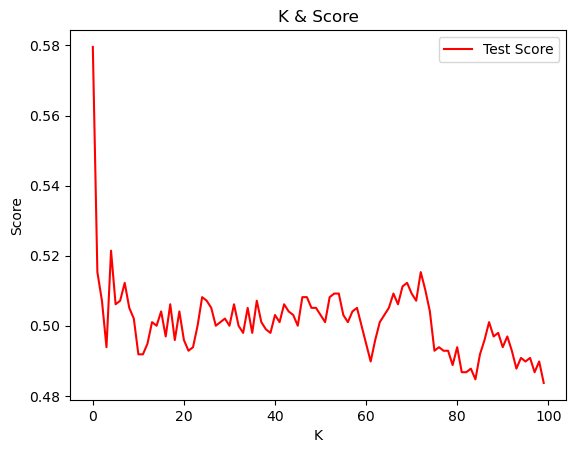

In [57]:
# plt.plot(train_scoreList[1:], "b--", label="Train Score")
plt.plot(test_scoreList[:], "r-", label="Test Score")
plt.title("K & Score")
plt.xlabel("K")
plt.ylabel("Score")
plt.legend()
plt.show()


In [51]:
test_scoreList


[0.5795918367346938,
 0.5153061224489796,
 0.5071428571428571,
 0.49387755102040815,
 0.5214285714285715,
 0.5061224489795918,
 0.5071428571428571,
 0.5122448979591837,
 0.5051020408163265,
 0.5020408163265306,
 0.49183673469387756,
 0.49183673469387756,
 0.49489795918367346,
 0.5010204081632653,
 0.5,
 0.5040816326530613,
 0.4969387755102041,
 0.5061224489795918,
 0.4959183673469388,
 0.5040816326530613,
 0.4959183673469388,
 0.4928571428571429,
 0.49387755102040815,
 0.5,
 0.5081632653061224,
 0.5071428571428571,
 0.5051020408163265,
 0.5,
 0.5010204081632653,
 0.5020408163265306,
 0.5,
 0.5061224489795918,
 0.5,
 0.49795918367346936,
 0.5051020408163265,
 0.49795918367346936,
 0.5071428571428571,
 0.5010204081632653,
 0.4989795918367347,
 0.49795918367346936,
 0.503061224489796,
 0.5010204081632653,
 0.5061224489795918,
 0.5040816326530613,
 0.503061224489796,
 0.5,
 0.5081632653061224,
 0.5081632653061224,
 0.5051020408163265,
 0.5051020408163265,
 0.503061224489796,
 0.50102040816

In [79]:
targetDF = wineDF["quality"]
scalar = StandardScaler()
featureList = []
for i in range(len(wineDF.columns[:-1])):
    for j in range(i + 1, len(wineDF.columns[:-1])):
        featureDF = wineDF[[wineDF.columns[i], wineDF.columns[j]]]
        x_train, x_test, y_train, y_test = train_test_split(
            featureDF, targetDF, test_size=0.2, stratify=targetDF
        )
        scalar.fit(x_train)
        scaled_x_train = scalar.transform(x_train)
        scaled_x_test = scalar.transform(x_test)

        max_k = 100
        train_scoreList = []
        test_scoreList = []
        for k in range(1, max_k + 1):
            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(scaled_x_train, y_train)
            train_scoreList.append(model.score(scaled_x_train, y_train))
            test_scoreList.append(model.score(scaled_x_test, y_test))
        featureList.append((train_scoreList, test_scoreList))


In [80]:
featureList[0]


([0.6003062787136294,
  0.5658499234303216,
  0.5758039816232772,
  0.5747830525778458,
  0.5719754977029097,
  0.5615109749872383,
  0.5627871362940275,
  0.5617662072485963,
  0.552833078101072,
  0.5459418070444104,
  0.5469627360898418,
  0.5464522715671261,
  0.5387953037263911,
  0.5331801939765186,
  0.5334354262378764,
  0.5301174068402246,
  0.531138335885656,
  0.5229709035222052,
  0.5171005615109749,
  0.5158244002041859,
  0.5127616130678918,
  0.50944359367024,
  0.5068912710566615,
  0.5007656967840735,
  0.5010209290454314,
  0.4992343032159265,
  0.5005104645227156,
  0.5025523226135784,
  0.4946401225114854,
  0.4992343032159265,
  0.4900459418070444,
  0.49795814190913734,
  0.4997447677386422,
  0.5017866258295048,
  0.4946401225114854,
  0.49693721286370596,
  0.49157733537519144,
  0.4936191934660541,
  0.49259826442062277,
  0.4948953547728433,
  0.49234303215926495,
  0.4908116385911179,
  0.4897907095456866,
  0.48749361919346607,
  0.4872383869321082,
  0.4900

In [81]:
len(featureList)


55

In [84]:
featureList_name = []
for i in range(len(wineDF.columns[:-1])):
    for j in range(i + 1, len(wineDF.columns[:-1])):
        featureList_name.append(wineDF.columns[i] + " & " + wineDF.columns[j])


In [85]:
featureList_name


['fixed acidity & volatile acidity',
 'fixed acidity & citric acid',
 'fixed acidity & residual sugar',
 'fixed acidity & chlorides',
 'fixed acidity & free sulfur dioxide',
 'fixed acidity & total sulfur dioxide',
 'fixed acidity & density',
 'fixed acidity & pH',
 'fixed acidity & sulphates',
 'fixed acidity & alcohol',
 'volatile acidity & citric acid',
 'volatile acidity & residual sugar',
 'volatile acidity & chlorides',
 'volatile acidity & free sulfur dioxide',
 'volatile acidity & total sulfur dioxide',
 'volatile acidity & density',
 'volatile acidity & pH',
 'volatile acidity & sulphates',
 'volatile acidity & alcohol',
 'citric acid & residual sugar',
 'citric acid & chlorides',
 'citric acid & free sulfur dioxide',
 'citric acid & total sulfur dioxide',
 'citric acid & density',
 'citric acid & pH',
 'citric acid & sulphates',
 'citric acid & alcohol',
 'residual sugar & chlorides',
 'residual sugar & free sulfur dioxide',
 'residual sugar & total sulfur dioxide',
 'residua

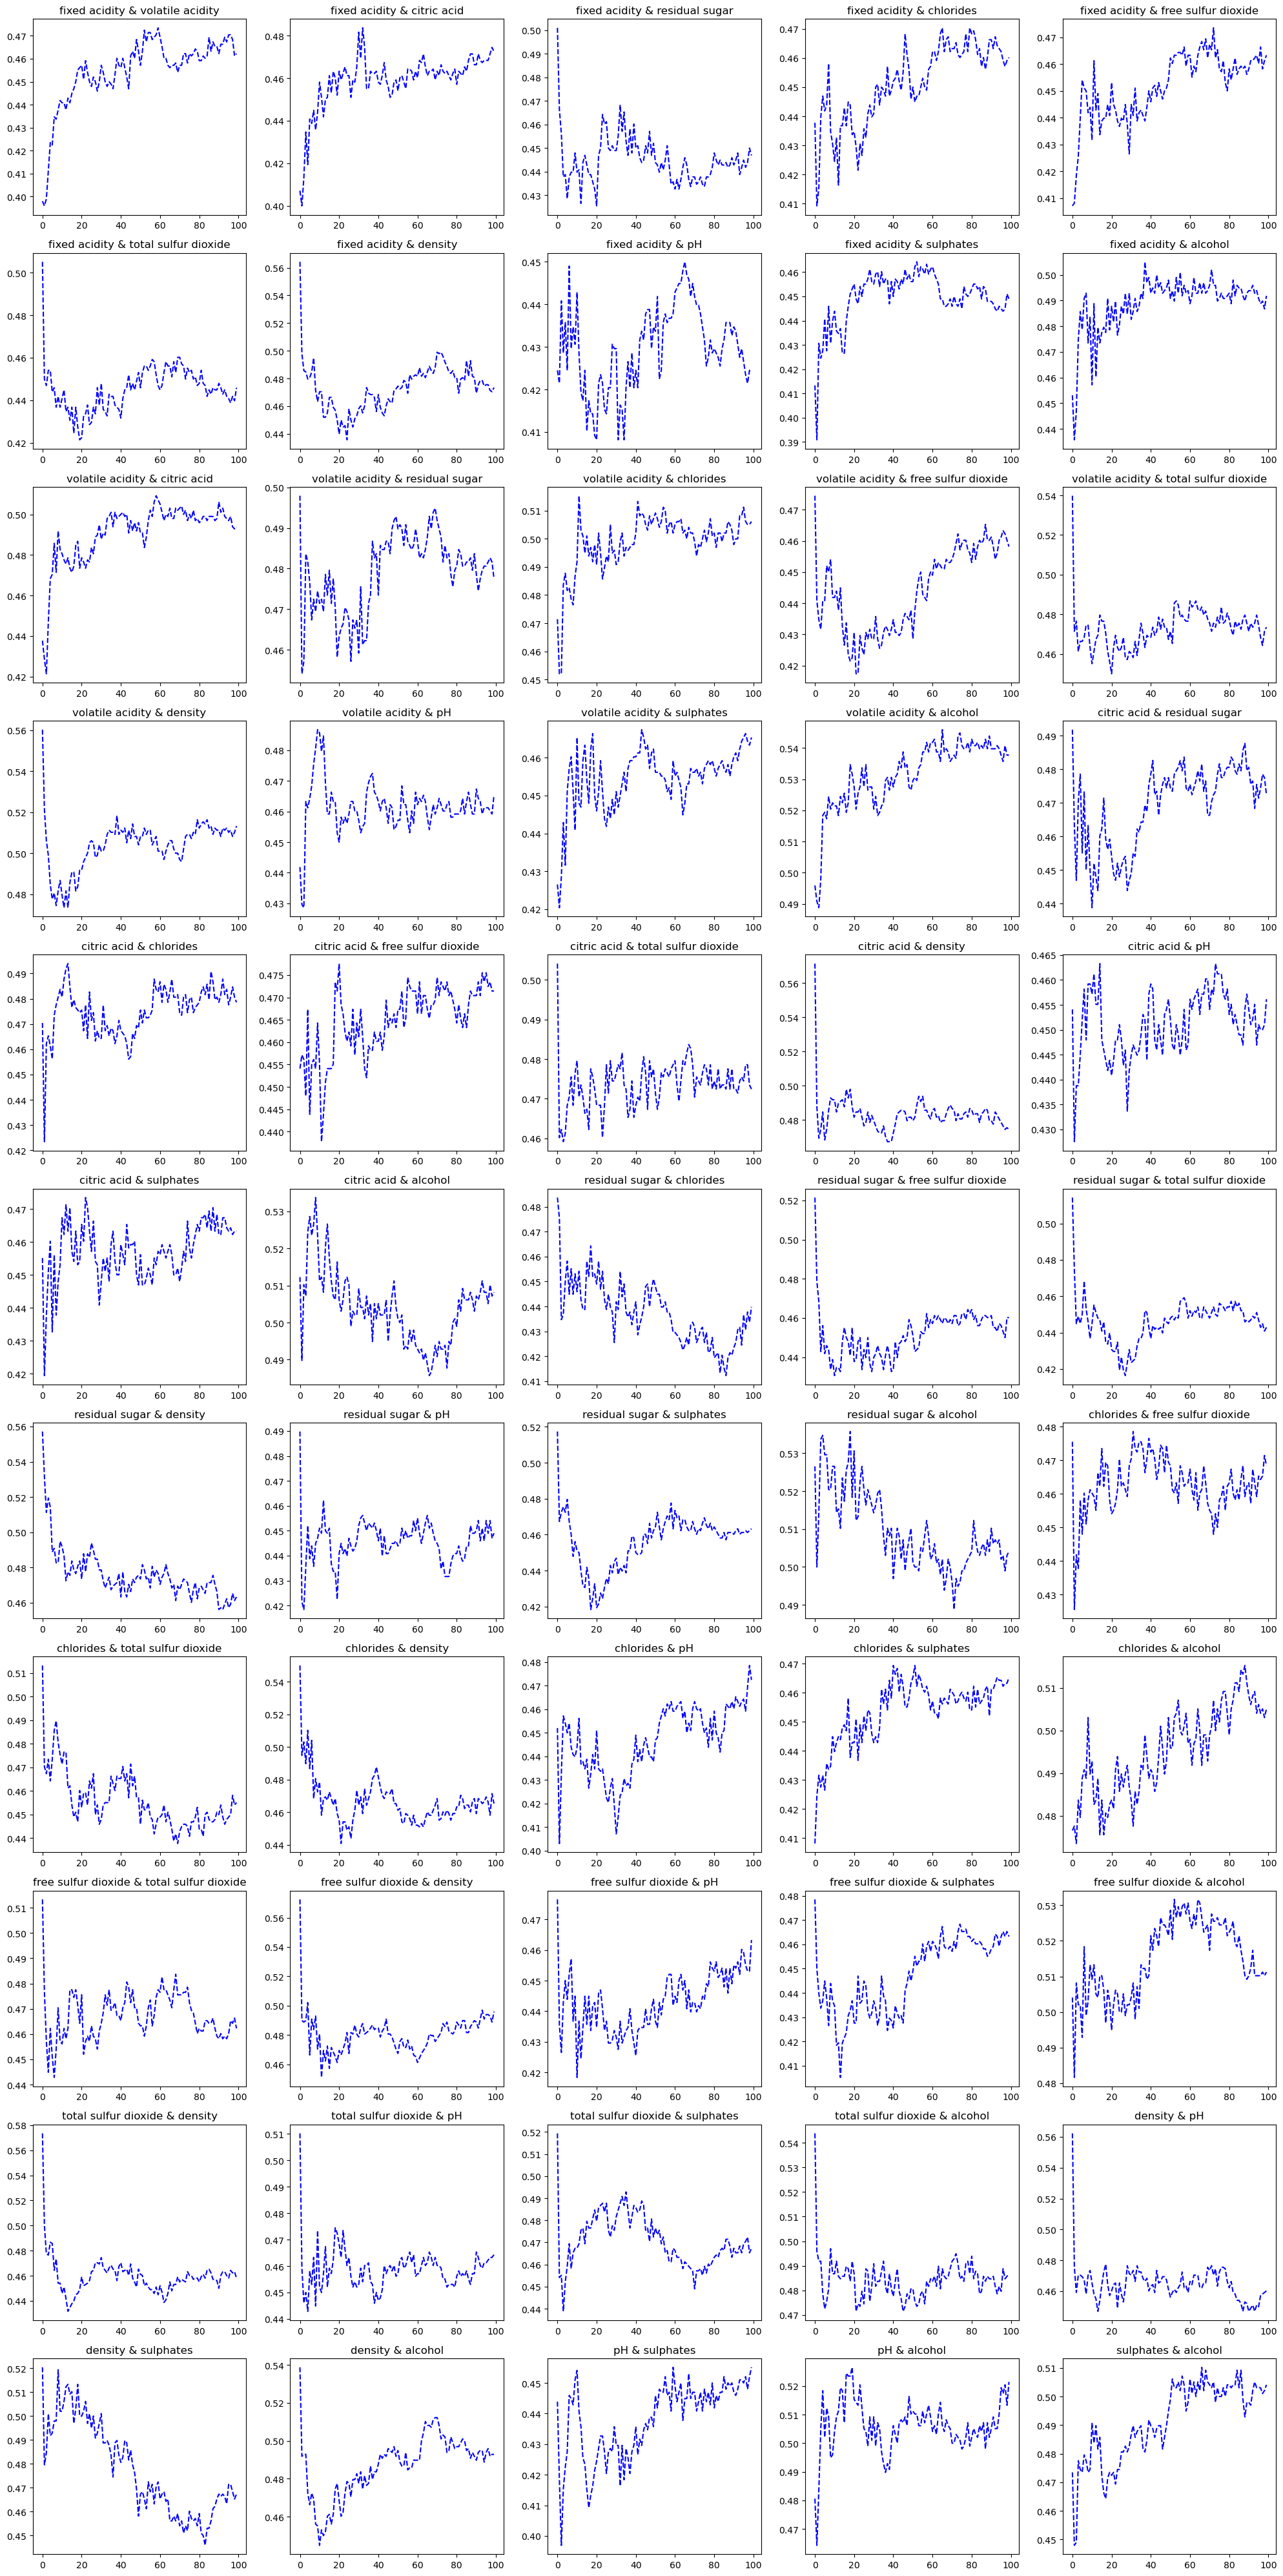

In [86]:
plt.figure(figsize=(20, 40))
for i in range(len(featureList)):
    plt.subplot(11, 5, i + 1)
    plt.plot(featureList[i][1], "b--", label="Train Score")
    plt.title(featureList_name[i])
plt.tight_layout()
plt.show()


In [89]:
featureDF = wineDF[["total sulfur dioxide", "density"]]
featureDF


,total sulfur dioxide,density
0,170.0,1.00100
1,132.0,0.99400
2,97.0,0.99510
3,186.0,0.99560
4,186.0,0.99560
...,...,...
4893,92.0,0.99114
4894,168.0,0.99490
4895,111.0,0.99254
4896,110.0,0.98869


In [90]:
x_train, x_test, y_train, y_test = train_test_split(
    featureDF, targetDF, test_size=0.2, stratify=targetDF
)
scalar.fit(x_train)
scaled_x_train = scalar.transform(x_train)
scaled_x_test = scalar.transform(x_test)
model = KNeighborsClassifier(n_neighbors=1)
model.fit(scaled_x_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [91]:
featureDF.describe()


,total sulfur dioxide,density
count,4898.000000,4898.000000
mean,138.360657,0.994027
std,42.498065,0.002991
min,9.000000,0.987110
25%,108.000000,0.991723
50%,134.000000,0.993740
75%,167.000000,0.996100
max,440.000000,1.038980


In [98]:
total_sulfur_dioxide, density = input(
    "Enter total sulfur dioxide and density (예: 138, 0.99): "
).split(",")
pre_val = pd.DataFrame(
    [[total_sulfur_dioxide, density]], columns=featureDF.columns
).astype(float)


In [99]:
pre_val


,total sulfur dioxide,density
0,138.0,0.99


In [102]:
scaled_pre_val = scalar.transform(pre_val)


In [103]:
model.predict(scaled_pre_val)


array([7], dtype=int64)